In [1]:
%matplotlib inline
from __future__ import division
import om10,os
import numpy as np
import matplotlib.pyplot as plt
import triangle

In [2]:
# redshift sigma g Reff r   i   z     g mag   r mag    i mag  z    w1     w2       w3      w4
lrgs = np.loadtxt(os.path.expandvars('$OM10_DIR/data/LRGo.txt'))
lrgs = lrgs[np.logical_and(lrgs[:,8]<24,lrgs[:,9]<22)]
#redshift       g    r    i    z     w1      w2       w3     w4
qsos = np.loadtxt(os.path.expandvars('$OM10_DIR/data/QSOo.txt'))
qsos = qsos[np.logical_and(qsos[:,3]>0,qsos[:,1]>0)] #require g and i band > 0 to kill -10,000 outliers

In [19]:
#db = om10.DB(catalog='$OM10_DIR/notebooks/painted_positioned_catalog.fits')
db = om10.DB(catalog='$OM10_DIR/notebooks/my_redshift_matching.fits')
matched = db.lenses[np.logical_and(db.lenses['SDSS_FLAG_SRC'] == 0,db.lenses['SDSS_FLAG_LENS'] == 0)]

In [13]:
print len(db.lenses)

15658


With 2-param matching, we have 6.8% successfully painted

##Comparing SDSS/OM10 Lenses/quasars

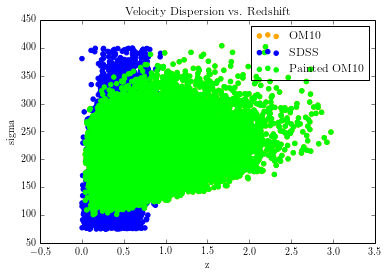

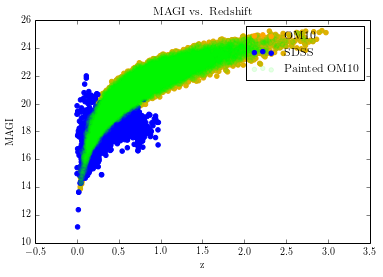

In [5]:
plt.figure()
plt.scatter(db.lenses['ZLENS'],db.lenses['VELDISP'],color='Orange',label='OM10')
plt.scatter(lrgs[:,0],lrgs[:,1],color='Blue',label='SDSS')
plt.scatter(matched['ZLENS'],matched['VELDISP'],color='Lime',label='Painted OM10')
plt.title('Velocity Dispersion vs. Redshift')
plt.xlabel('z')
plt.ylabel('sigma')
plt.legend()

plt.figure()
plt.scatter(db.lenses['ZLENS'],db.lenses['APMAG_I'],color='Orange',label='OM10')
plt.scatter(lrgs[:,0],lrgs[:,9],color='Blue',label='SDSS')
plt.scatter(matched['ZLENS'],matched['APMAG_I'],color='Lime',label='Painted OM10',alpha=.1)
plt.title('MAGI vs. Redshift')
plt.xlabel('z')
plt.ylabel('MAGI')
plt.legend()

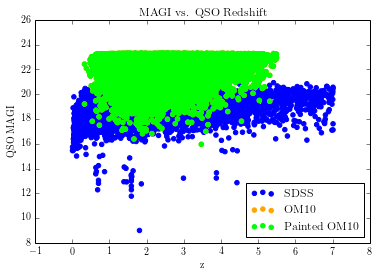

In [6]:
plt.figure()
plt.scatter(qsos[:,0],qsos[:,3],color='Blue',label='SDSS')
plt.scatter(db.lenses['ZSRC'],db.lenses['MAGI'],color='Orange',label='OM10')
plt.scatter(matched['ZSRC'],matched['MAGI'],color='Lime',label='Painted OM10')
plt.title('MAGI vs. QSO Redshift')
plt.xlabel('z')
plt.ylabel('QSO MAGI')
plt.legend(loc=4)

binned strucure in SDSS painted QSO magnitudes

##Extrapolating from SDSS to higher redshift?
- ZLENS < 1
- 200 < VELDISP < 300 

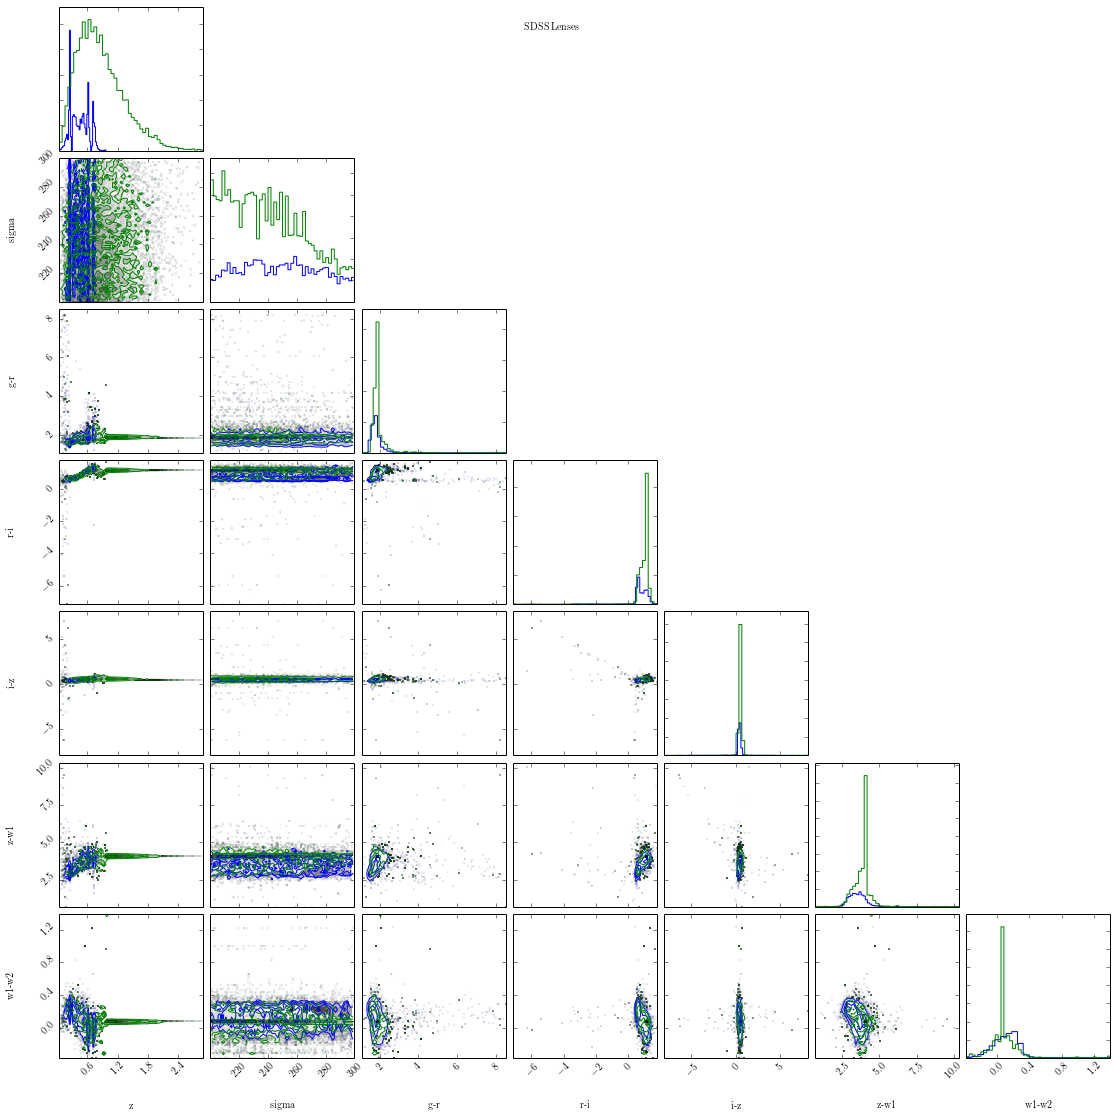

In [20]:
matched = matched[matched['ZLENS'] < 3]
matched = matched[matched['ZSRC'] < 4.5]
matched = matched[np.logical_and(matched['VELDISP'] > 200,matched['VELDISP'] < 300)]

lrgs = lrgs[np.logical_and(np.logical_and(lrgs[:,8]<24,lrgs[:,9]<22),np.abs(lrgs[:,1]-250)<50)]
to_plot = np.array([lrgs[:,0], lrgs[:,1], lrgs[:,6]-lrgs[:,7], lrgs[:,7]-lrgs[:,8],\
                    lrgs[:,8]-lrgs[:,9], lrgs[:,9]-lrgs[:,10], lrgs[:,10]-lrgs[:,11]]).transpose()
painted_lenses = np.array([matched['ZLENS'],matched['VELDISP'],matched['MAGG_LENS']-matched['MAGR_LENS'], \
                    matched['MAGR_LENS']-matched['MAGI_LENS'],matched['MAGI_LENS']-matched['MAGZ_LENS'], \
                    matched['MAGZ_LENS']-matched['MAGW1_LENS'],matched['MAGW1_LENS']-matched['MAGW2_LENS']]).transpose()
fig = triangle.corner(to_plot,labels=['z','sigma','g-r','r-i','i-z','z-w1','w1-w2'],color='Blue')
_ = triangle.corner(painted_lenses,labels=['z','sigma','g-r','r-i','i-z','z-w1','w1-w2'],color='Green',fig=fig)
plt.suptitle('SDSS Lenses')

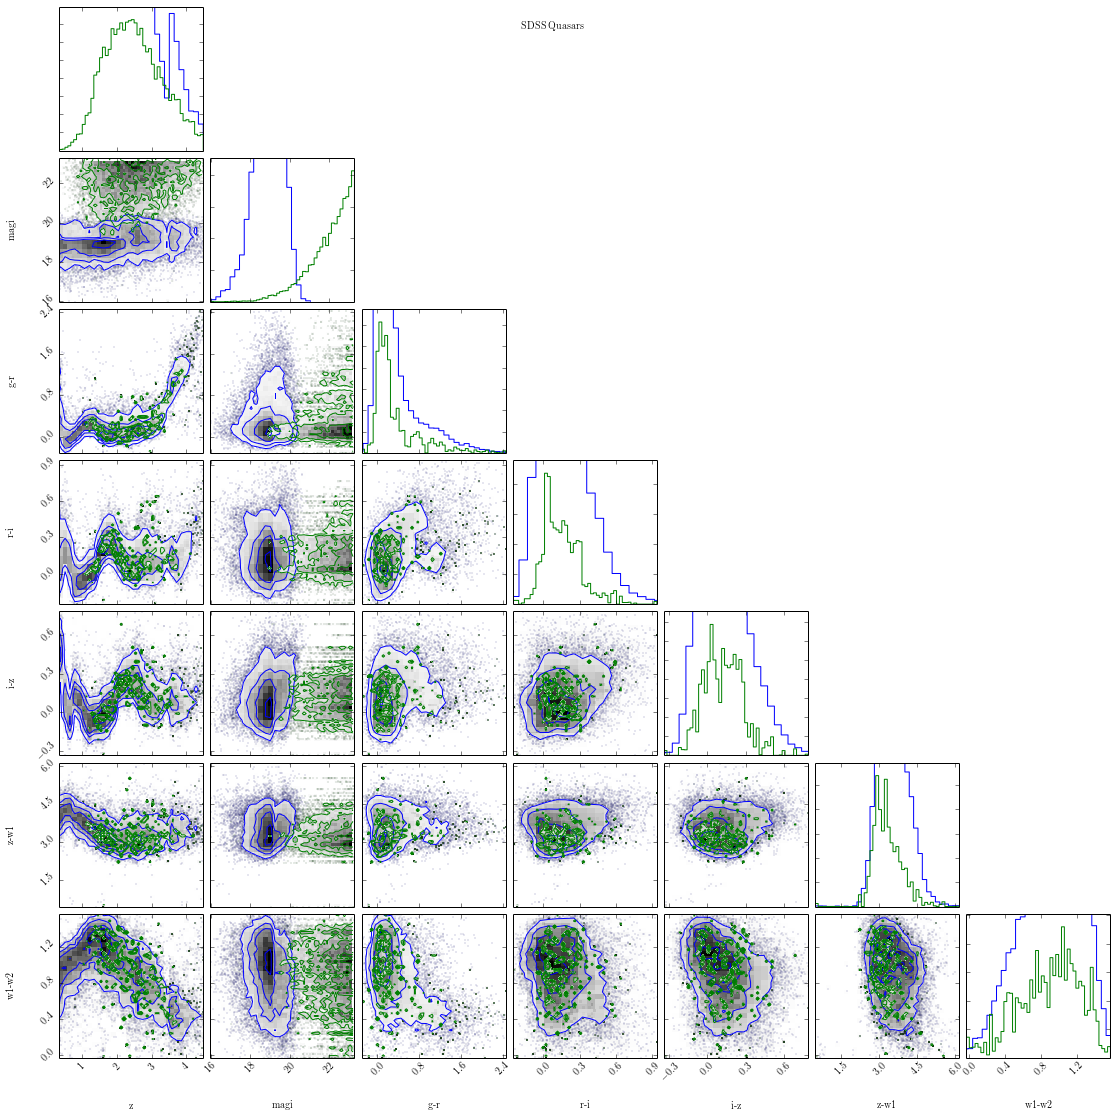

In [16]:
to_plot = np.array([qsos[:,0], qsos[:,3], qsos[:,1]-qsos[:,2], qsos[:,2]-qsos[:,3], qsos[:,3]-qsos[:,4],\
                   qsos[:,4]-qsos[:,5],qsos[:,5]-qsos[:,6]]).transpose()
painted_qsos = np.array([matched['ZSRC'],matched['MAGI'],matched['MAGG_SRC']-matched['MAGR_SRC'], \
                    matched['MAGR_SRC']-matched['MAGI_SRC'],matched['MAGI_SRC']-matched['MAGZ_SRC'], \
                    matched['MAGZ_SRC']-matched['MAGW1_SRC'],matched['MAGW1_SRC']-matched['MAGW2_SRC']]).transpose()
fig = triangle.corner(to_plot,labels=['z','magi','g-r','r-i','i-z','z-w1','w1-w2'],color='Blue')
_ = triangle.corner(painted_qsos,labels=['z','magi','g-r','r-i','i-z','z-w1','w1-w2'],color='Green',fig=fig)
plt.suptitle('SDSS Quasars')

In [11]:
print matched['ZSRC','MAGI' ,'MAGR_SRC','MAGI_SRC','SDSS_FLAG_SRC']

ZSRC   MAGI   MAGR_SRC MAGI_SRC SDSS_FLAG_SRC
---- -------- -------- -------- -------------
4.01 22.94768 19.80611 19.39259           0.0
3.08  20.8123 19.07229 18.80365           0.0
2.08 21.87704 19.02151 18.81176           0.0
2.23 22.45241 18.67111 18.64709           0.0
0.72 20.04573 18.97045 19.08461           0.0
2.11 22.61355  19.2214 19.06641           0.0
 1.3 21.20094 18.47515 18.43128           0.0
2.16 22.90721 19.33539 19.30999           0.0
3.22 22.57836 19.96885 19.68628           0.0
1.25 22.79915 19.28136 19.22559           0.0
2.05 21.26055  17.8603 17.76132           0.0
 ...      ...      ...      ...           ...
3.84 22.89857  19.5085 19.59318           0.0
3.23 23.29621 18.38766 17.96734           0.0
4.58 22.28162 19.16477 18.22314           0.0
2.58 21.44236 19.29027 19.30702           0.0
3.04 21.18063 20.05099 19.58083           0.0
1.44 23.24006 18.21775 18.17388           0.0
2.48 21.65823 15.91154 15.83115           0.0
1.54 20.02747 19.76809 19.45691   

With ZLENS < 1, we match 6151 of 15658 lenses. With ZLENS < 3, we match 9044, but all lenses past z=1 get exactly the same color...

In [17]:
len(matched)

9044

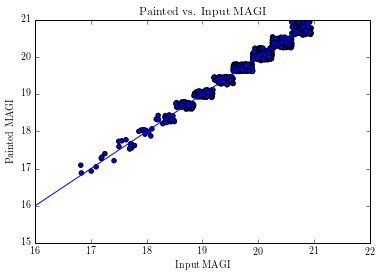

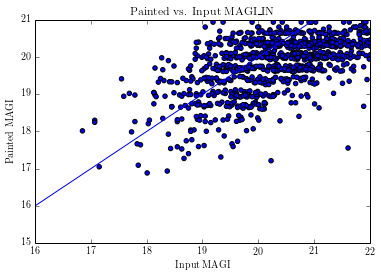

In [58]:
plt.scatter(matched['MAGI'],matched['MAGI_SRC'])
plt.plot(np.arange(15,23),np.arange(15,23))
plt.xlim(16,22)
plt.ylim(15,21)
plt.title('Painted vs. Input MAGI')
plt.xlabel('Input MAGI')
plt.ylabel('Painted MAGI')

plt.figure()
plt.scatter(matched['MAGI_IN'],matched['MAGI_SRC'])
plt.plot(np.arange(15,23),np.arange(15,23))
plt.xlim(16,22)
plt.ylim(15,21)
plt.title('Painted vs. Input MAGI\_IN')
plt.xlabel('Input MAGI')
plt.ylabel('Painted MAGI')